In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/exp-1_train.csv')
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [3]:
data.shape

(700, 2)

In [4]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [5]:
data.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [6]:
x=data.iloc[0:700,0:1]
y=data.iloc[0:700,1:2]

In [8]:
x

,x
0,24.0
1,50.0
2,15.0
3,38.0
4,87.0
...,...
695,58.0
696,93.0
697,82.0
698,66.0


<Axes: >

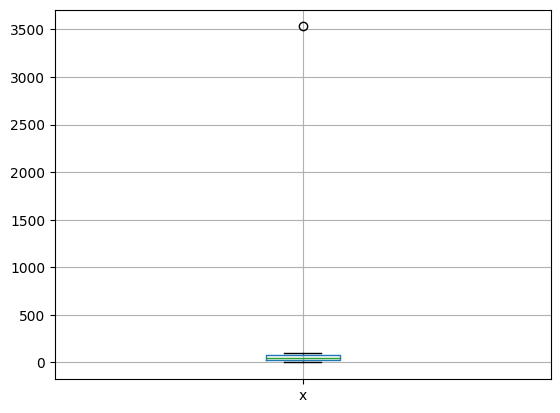

In [9]:
x.boxplot(column=['x'])

<Axes: >

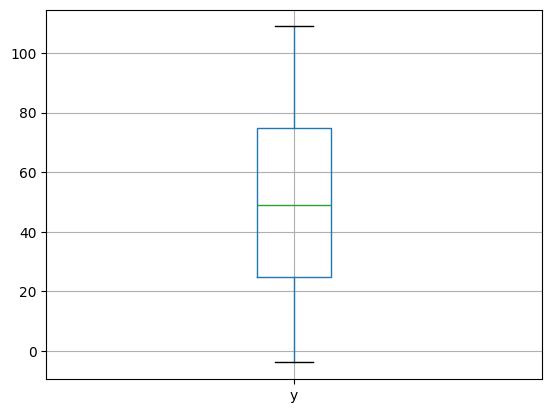

In [10]:
y.boxplot(column=['y'])

Text(0.5, 1.0, 'X vs Y Scatter plot')

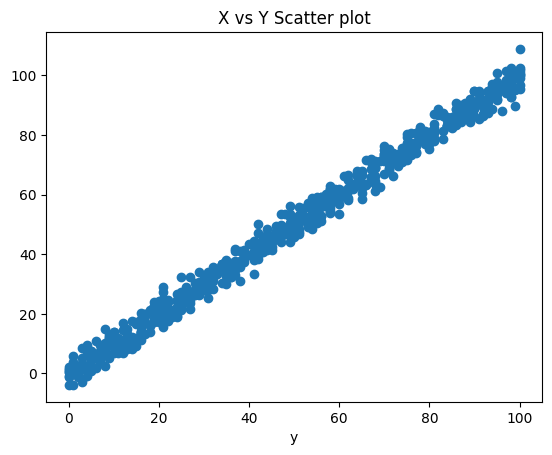

In [11]:
#Plot the Scatter Plot
plt.scatter(x,y)
plt.xlabel('x')
plt.xlabel('y')
plt.title("X vs Y Scatter plot")

In [12]:
#Linear Regression
def hypothesis(theta_array,x):
  return theta_array[0]+theta_array[1]*x

In [13]:
def cost_function(theta_array,x,y,m):
  error=0
  for i in range(m):
    error=error+((theta_array[0]+theta_array[1]*x[i])-y[i])**2
  return error/(2*m)

In [14]:
def gradiant_descent(theta_array,x,y,m,alpha):
  summation_0=0
  summation_1=0
  for i in range(m):
    summation_0+=((theta_array[0]+theta_array[1]*x[i])-y[i])
    summation_1+=x[i]*((theta_array[0]+theta_array[1]*x[i])-y[i])
  new_theta0=theta_array[0]-(alpha/m)*summation_0
  new_theta1=theta_array[1]-(alpha/m)*summation_1
  updated_new_theta=[new_theta0,new_theta1]
  return updated_new_theta

In [15]:
def training(x,y,alpha,iters):
  theta0=0
  theta1=0
  theta_array=[theta0,theta1]
  cost_values=[]
  m=x.size

  for i in range(iters):
    theta_array=gradiant_descent(theta_array,x,y,m,alpha)
    cost_values.append(cost_function(theta_array,x,y,m))
    y_predict=x*theta_array[1]+theta_array[0]
    plt.plot(y_predict,x,'r')
    plt.scatter(x,y)
    plt.show()
  return cost_values,theta_array

In [16]:
#feeding the input data
training_data=data.dropna()


In [17]:
training_data.shape


(699, 2)

In [18]:
x_value=training_data['x']
y_value=training_data['y']

In [20]:
x_value=x_value.values.reshape(x_value.size)
y_value=y_value.values.reshape(y_value.size)

In [21]:
type(x_value)

numpy.ndarray

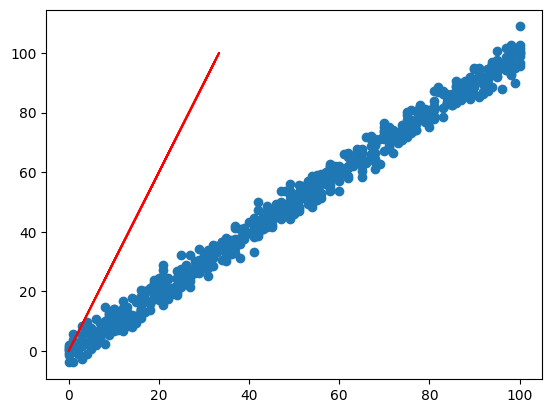

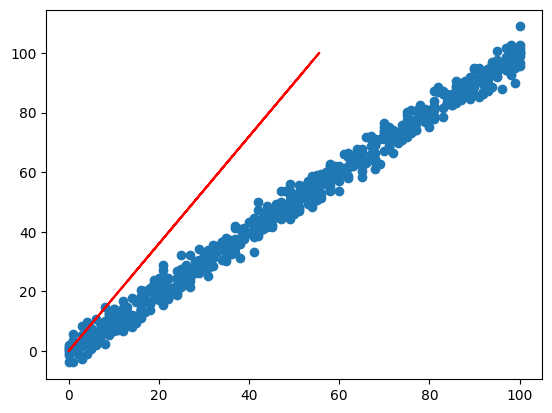

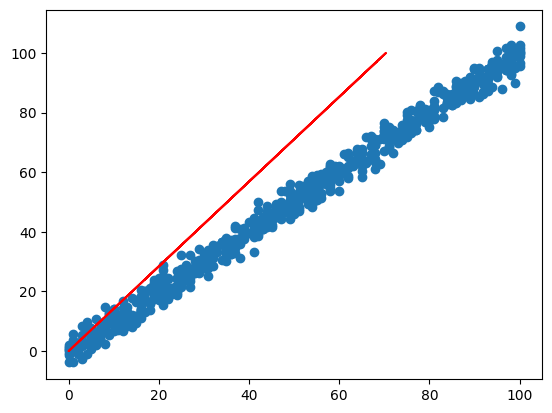

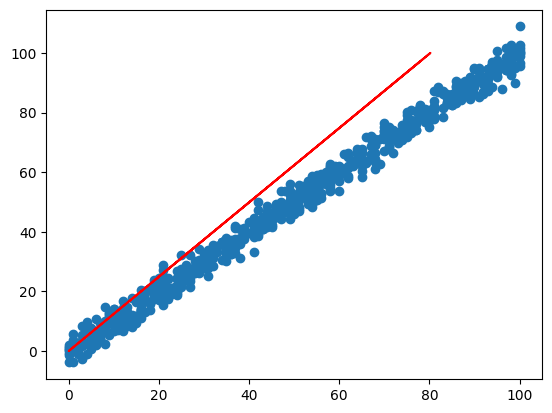

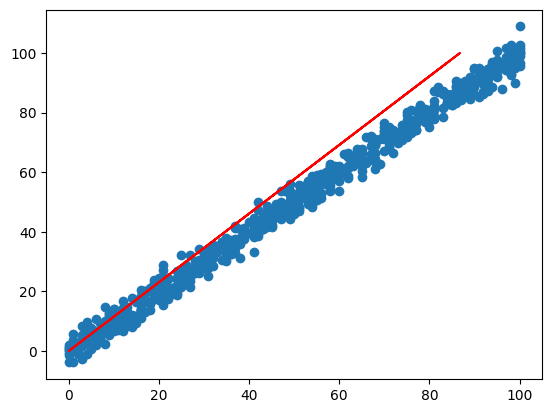

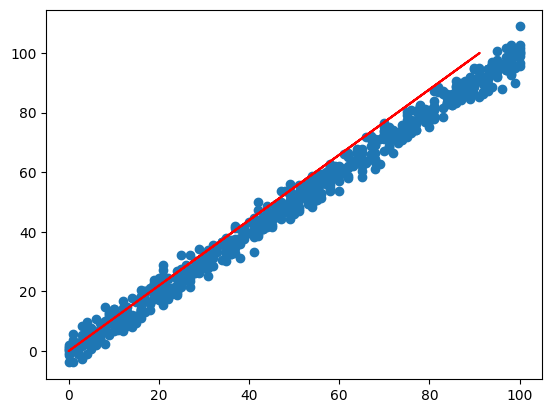

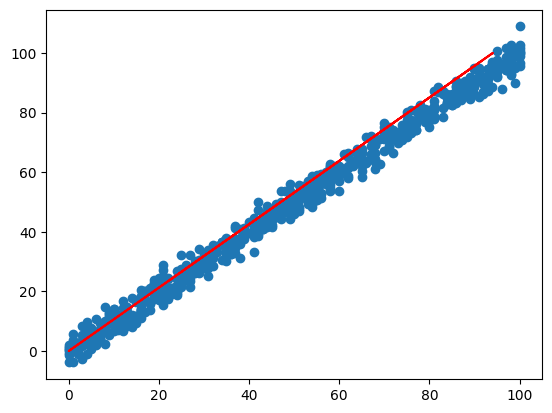

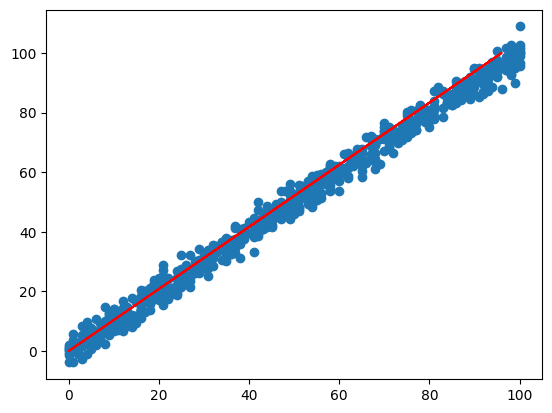

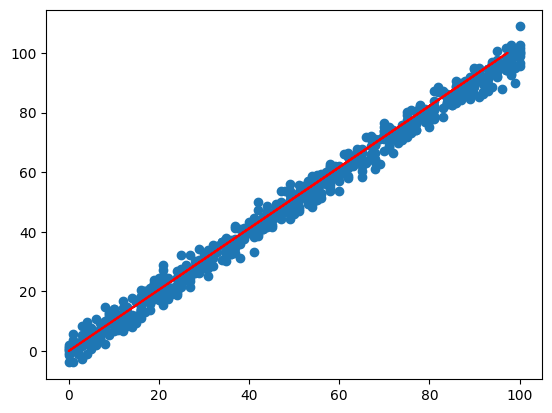

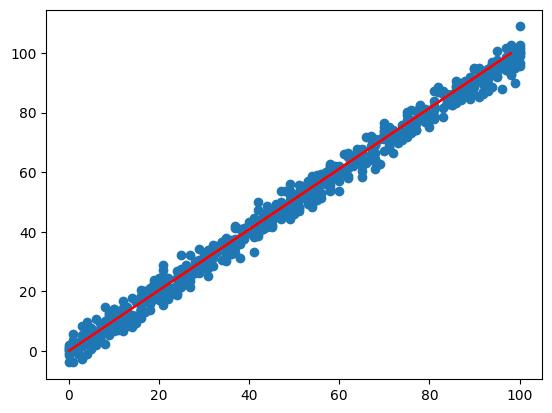

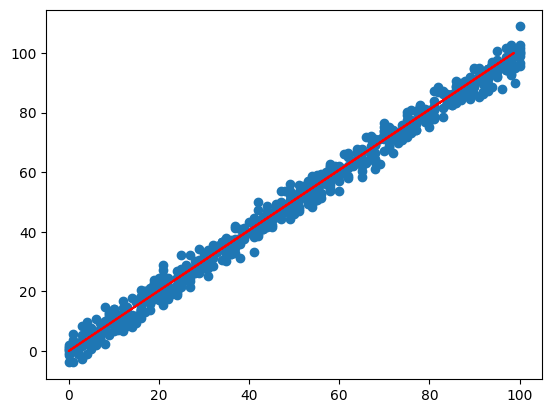

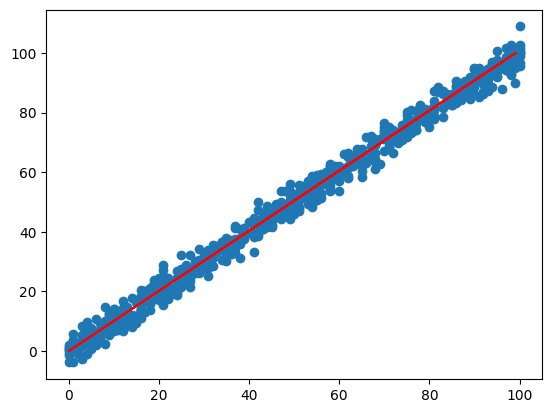

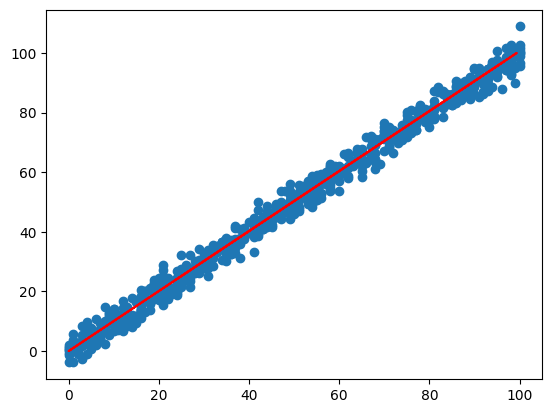

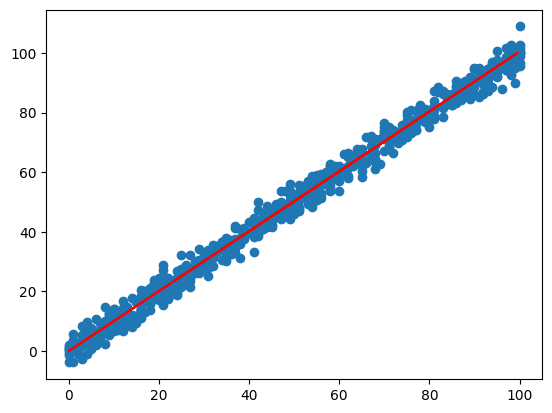

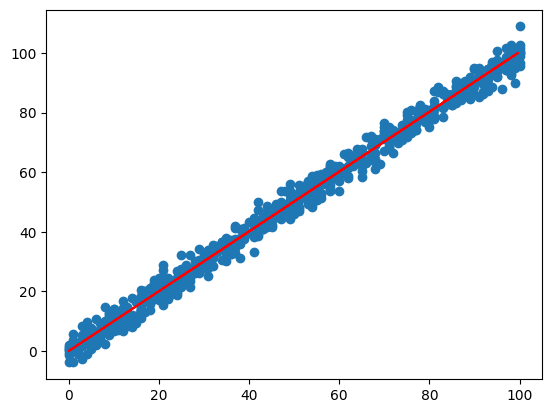

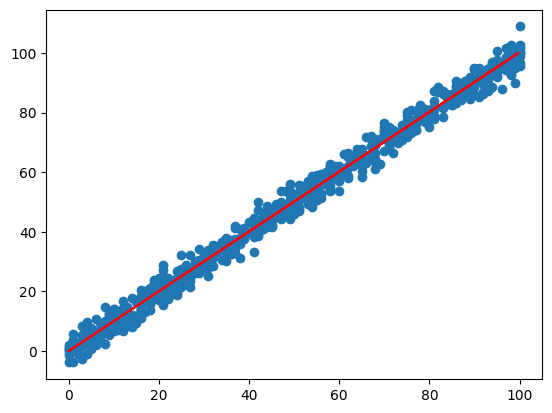

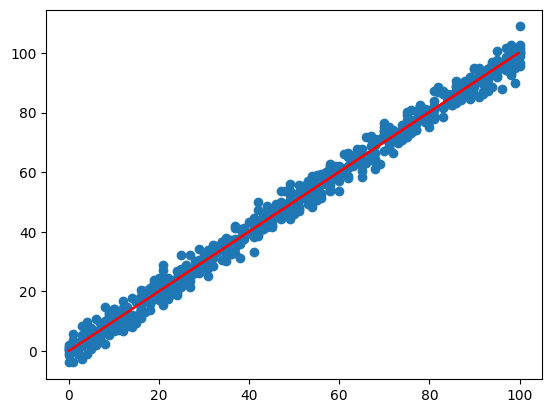

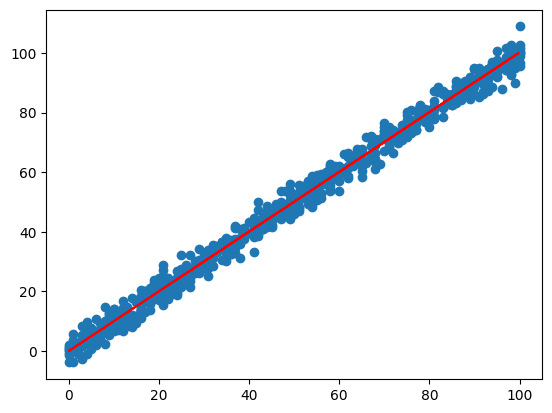

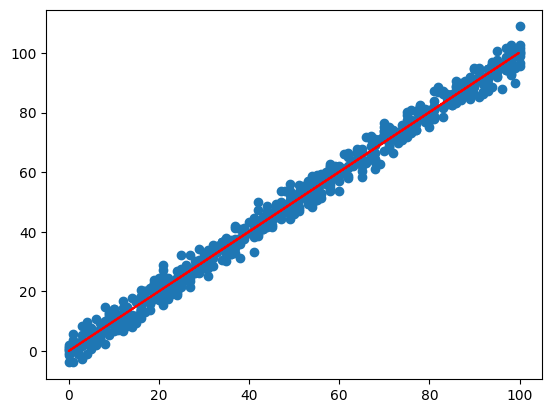

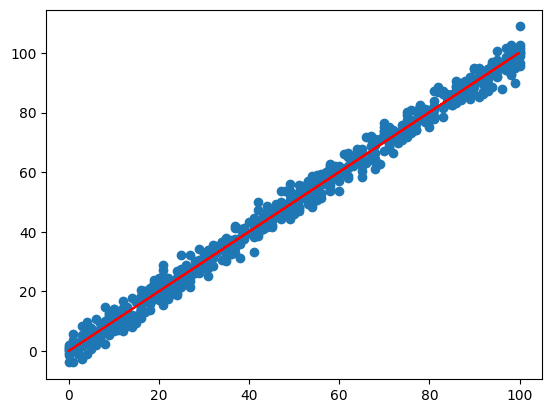

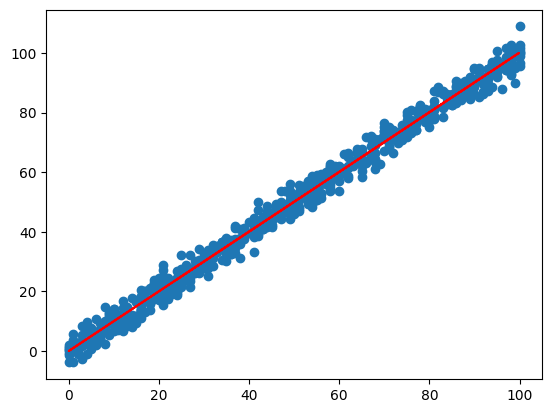

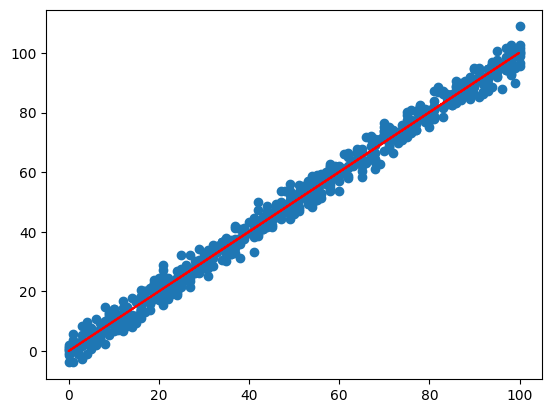

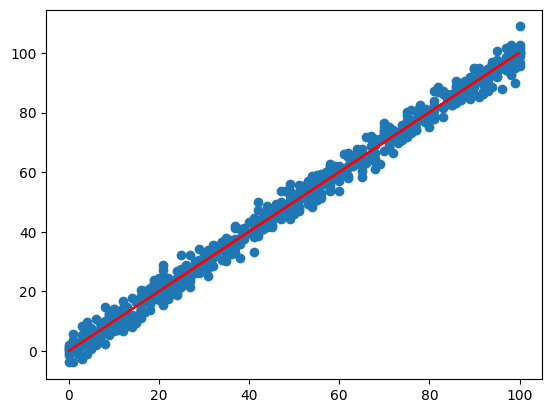

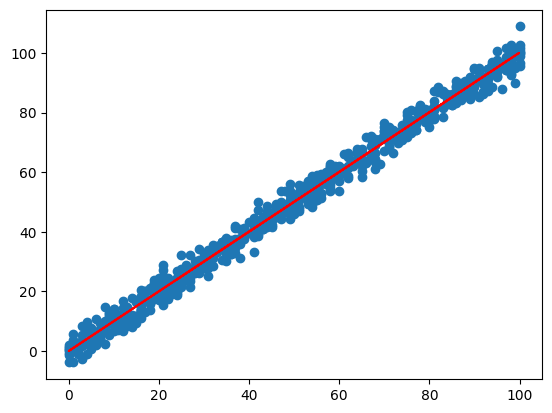

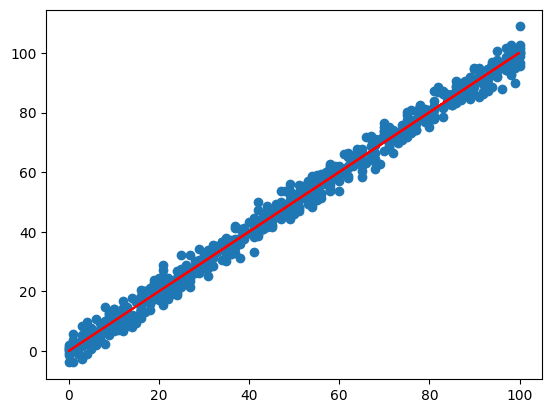

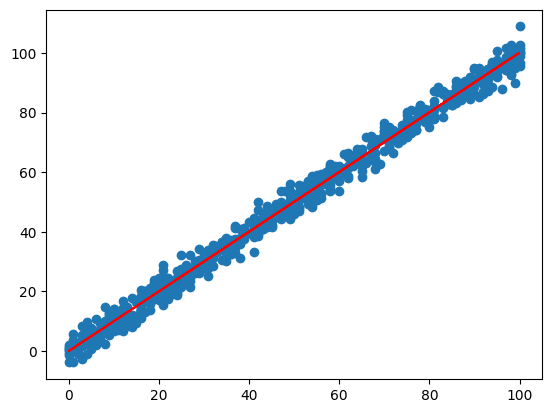

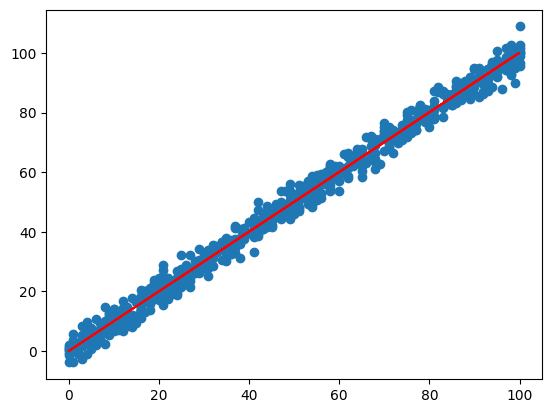

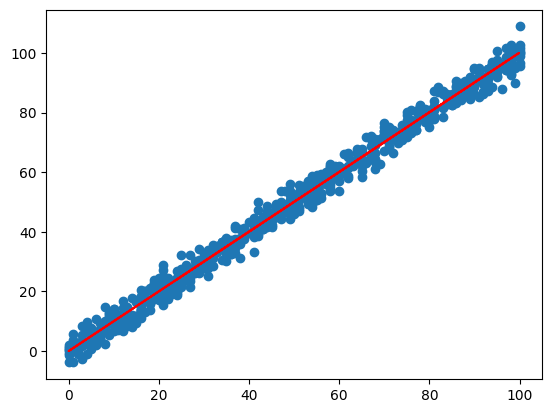

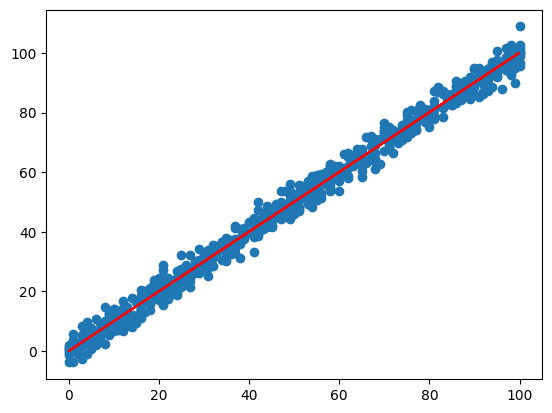

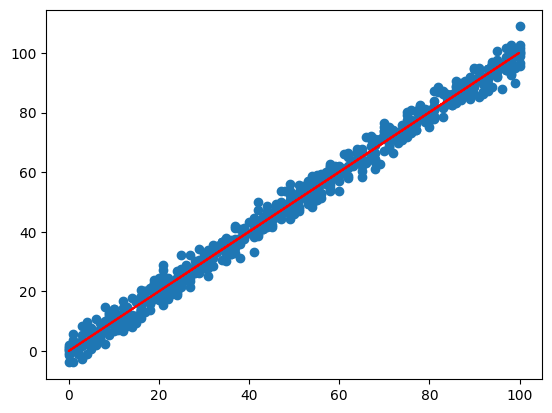

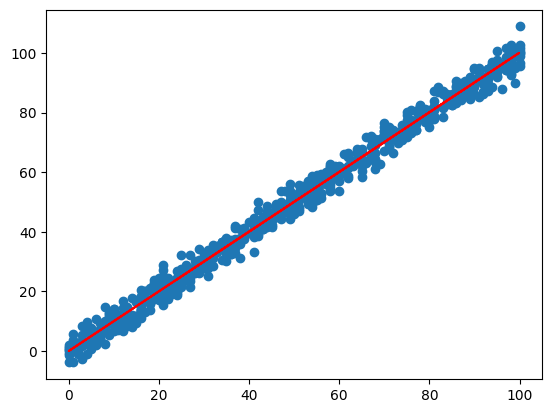

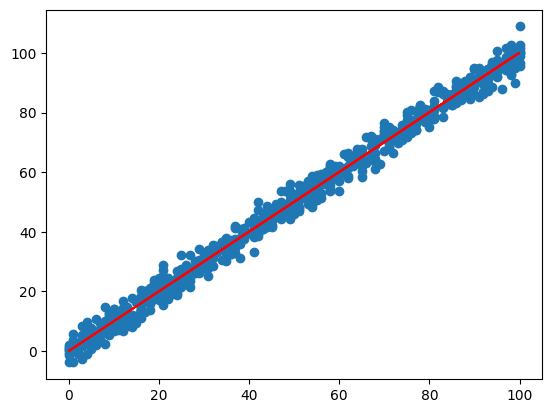

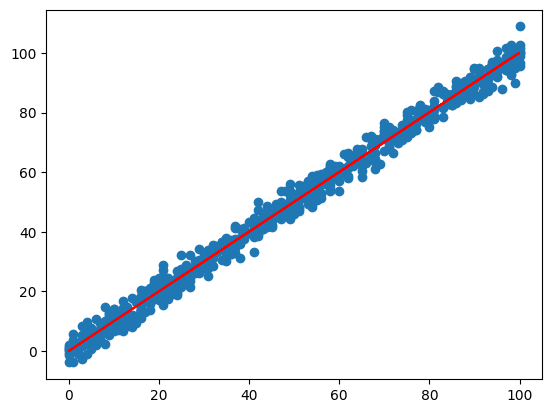

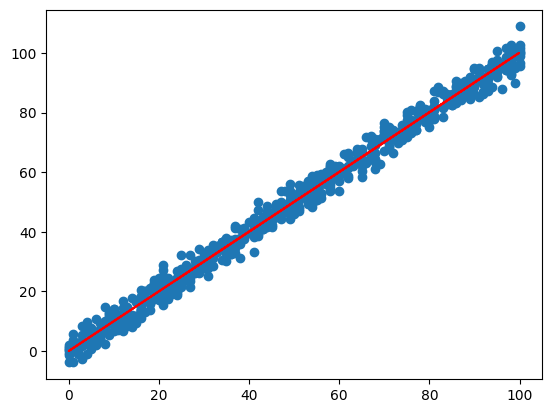

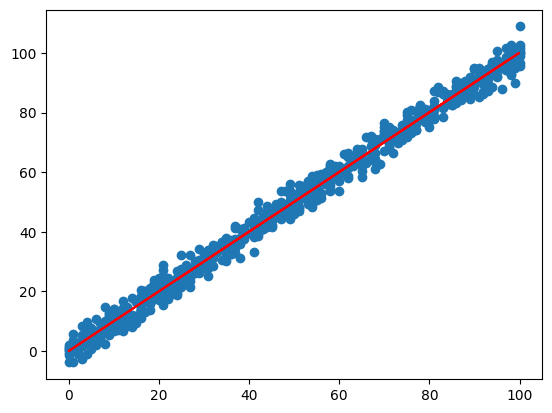

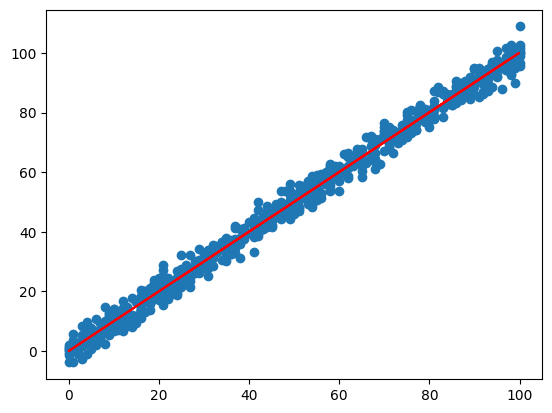

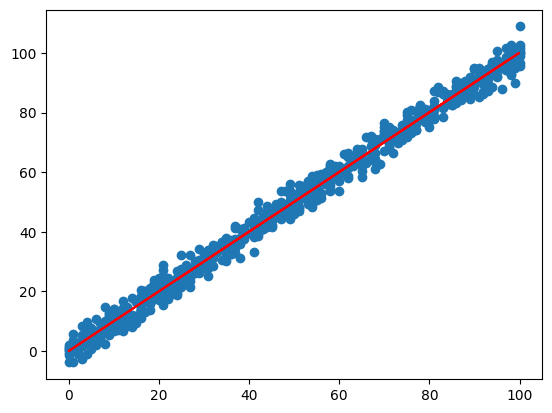

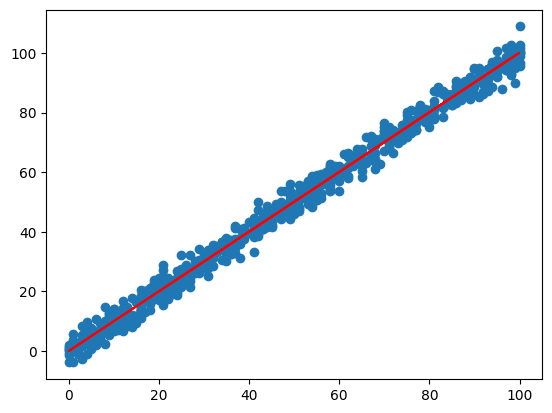

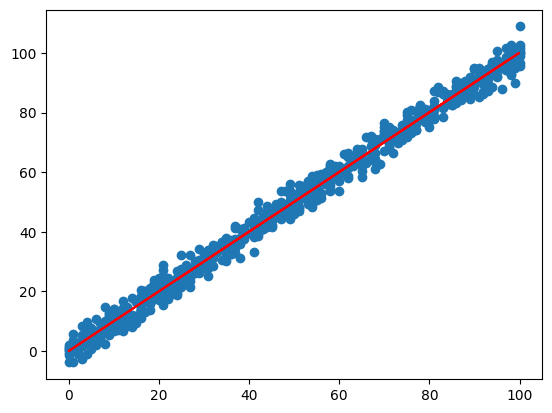

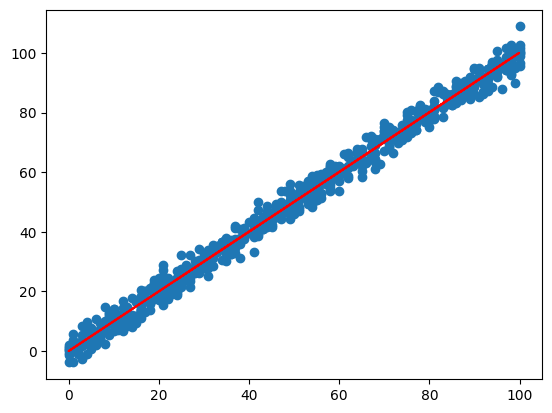

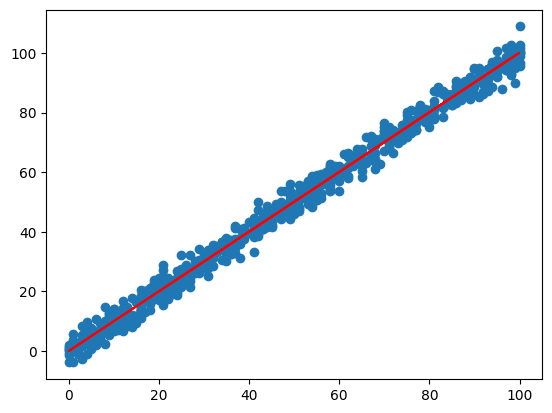

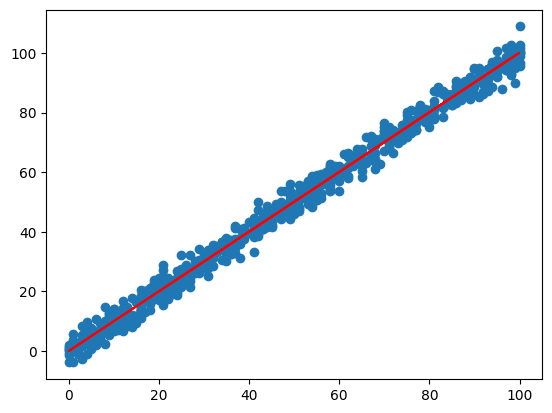

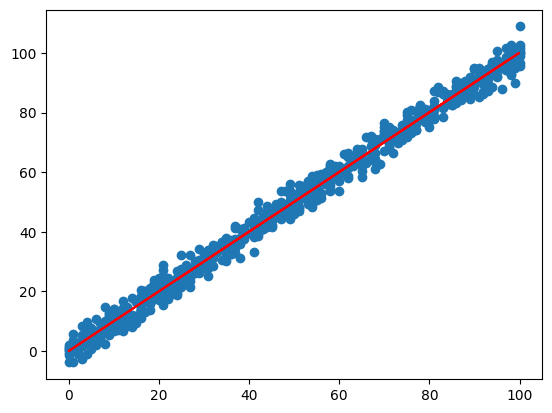

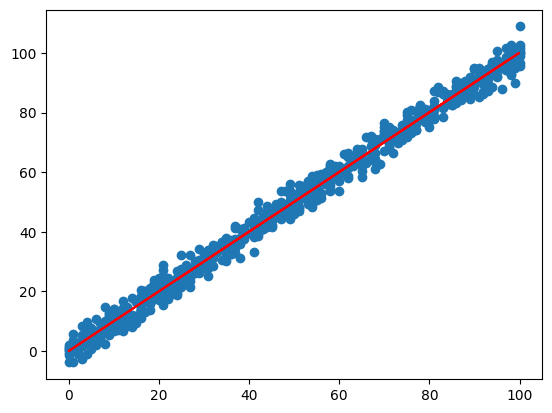

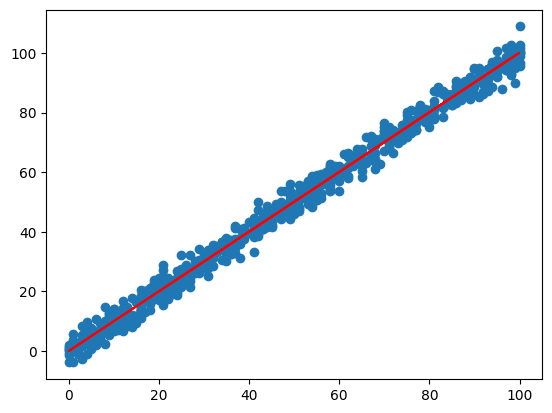

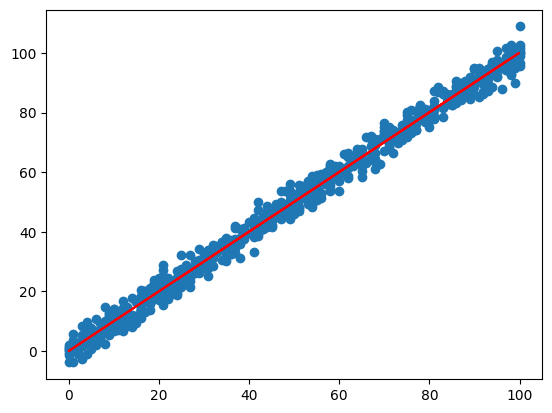

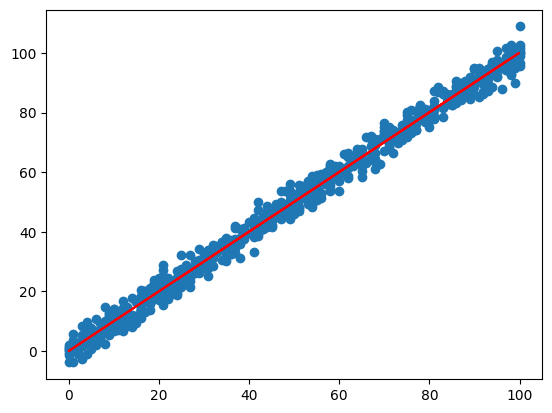

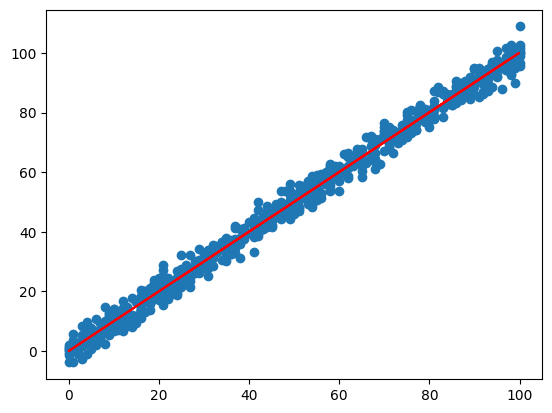

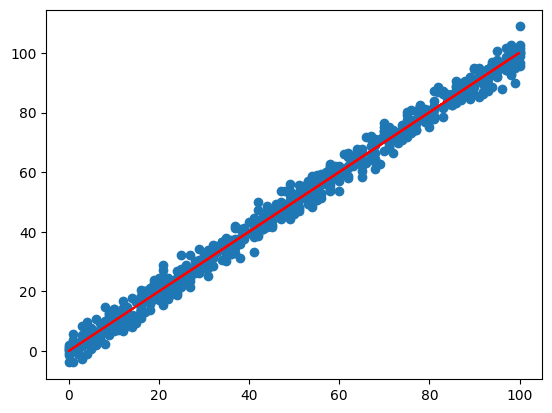

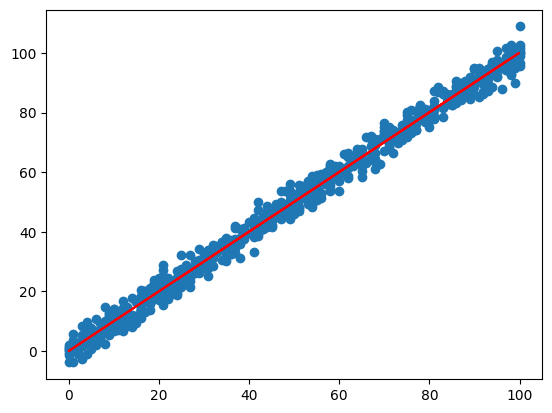

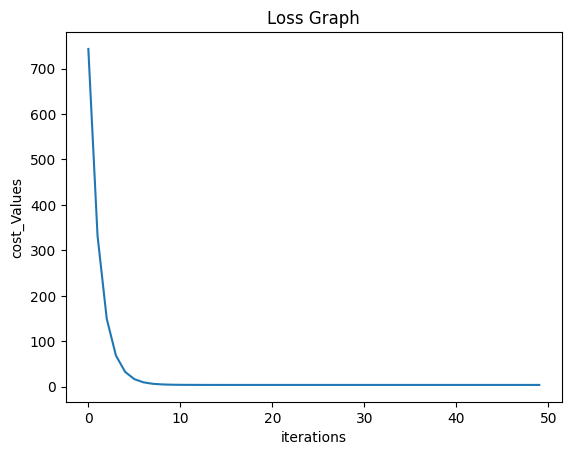

[np.float64(0.014811035918317207), np.float64(0.9988274599652097)]


In [22]:
alpha=0.0001
iters=50
cost_val,theta_array=training(x_value,y_value,alpha,iters)
x_axis=np.arange(0,len(cost_val),step=1)
plt.plot(x_axis,cost_val)
plt.xlabel("iterations")
plt.ylabel("cost_Values")
plt.title("Loss Graph")
plt.show()
print(theta_array)


In [23]:
hypothesis(theta_array,12.0)

np.float64(12.000740555500833)

In [24]:
data.isnull().sum()

,0
x,0
y,1


In [25]:
data.isnull().sum()/data.shape[0]*100

,0
x,0.000000
y,0.142857
